# Garmin Data Exploration and Wrangling

### Preliminary Work

Firstly, we import the required packages then import the dataset and view the first few rows.

In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now, read the csv file and view the head of the data.

In [26]:
garmin = pd.read_csv("activities.csv")

Let's view the general info of the dataset

In [27]:
print("Number of columns in dataset:", len(garmin))
print()
print(garmin.info())

Number of columns in dataset: 160

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Type             160 non-null    object 
 1   Date                      160 non-null    object 
 2   Favorite                  160 non-null    bool   
 3   Title                     160 non-null    object 
 4   Distance                  160 non-null    object 
 5   Calories                  160 non-null    object 
 6   Time                      160 non-null    object 
 7   Avg HR                    160 non-null    int64  
 8   Max HR                    160 non-null    int64  
 9   Aerobic TE                160 non-null    object 
 10  Avg Run Cadence           160 non-null    int64  
 11  Max Run Cadence           160 non-null    int64  
 12  Avg Pace                  160 non-null    object 
 13  Best Pace                 160 

## Data Wrangling

### Change Column Names

View column names and change them to suitable, easy to manage names.

In [28]:
garmin.columns = ['activity', 'date', 'fav', 'title', 'distance', 'calories', 
                  'time', 'avg_hr', 'max_hr', 'aerobic_te', 'avg_run_cadence',
                  'max_run_cadence', 'avg_pace', 'best_pace', 'total_ascent',
                  'total_descent', 'avg_stride', 'avg_vert_ratio', 
                  'avg_vert_osc', 'avg_ground_contact',
                  'avg_run_cadence1', 'max_run_cadence1', 'training_stress', 'max_avg_power20',
                  'avg_power', 'max_power', 'grit', 'flow', 'total_strokes', 'avg_swolf',
                  'avg_stroke_rate', 'total_reps', 'dive_time', 'min_temp',
                  'surface_interval', 'decomp', 'best_lap', 'number_laps',
                  'max_temp', 'moving_time', 'elapsed_time', 'min_elav', 'max_elav' ]

### Change Column Data Types

In [29]:
# Choose columns to change
change_int = ['distance', 'calories', 'aerobic_te', 'total_ascent', 'total_descent', 
              'max_avg_power20', 'total_strokes', 'min_elav', 'max_elav']

change_time3 = ['time', 'moving_time', 'elapsed_time']


# Remove commas from dataset
garmin[change_int] = garmin[change_int].replace(",", "", regex=True)

# Change "--" to 0 in whole dataset
garmin = garmin.replace("--","", regex=True)

# Change empty cells to 0 and hope for the best
garmin[change_int] = garmin[change_int].replace("", "0", regex=True)

**Convert Column Data Types**

In [30]:
# Change to floats
garmin[change_int] = garmin[change_int].astype(float)

# Change date to datetime
garmin["date"] = pd.to_datetime(garmin["date"])

# Change to time columns "00:00:00"
garmin['time'] = pd.to_datetime(garmin['time'], format='%H:%M:%S')
garmin['moving_time'] = pd.to_datetime(garmin['moving_time'], format='%H:%M:%S')
garmin['elapsed_time'] = pd.to_datetime(garmin['elapsed_time'], format='%H:%M:%S')

### Create 2022 Dataset

In [31]:
garmin["year"] = garmin["date"].dt.year
garmin22 = garmin[garmin["year"] == 2022]

### Remove/Change Data Entries

$\textbf{Cycling Data Entry}$

In [32]:
cycling = garmin22[garmin22['activity'] == 'Cycling']
cycling.head(1)

,activity,date,fav,title,distance,calories,time,avg_hr,max_hr,aerobic_te,...,surface_interval,decomp,best_lap,number_laps,max_temp,moving_time,elapsed_time,min_elav,max_elav,year
138,Cycling,2022-01-17 11:56:45,False,South Gloucestershire Cycling,23.22,813.0,1900-01-01 01:02:41,144,179,4.4,...,0:00,No,09:35.47.4,5,0.0,1900-01-01 00:59:07,1900-01-01 01:02:41,43.0,80.0,2022


Appears to be a repeated entry - might have been recorded on my watch as well as my bike GPS.

In [33]:
# Remove cycling row
garmin22 = garmin22[garmin22.activity != "Cycling"]

$\textbf{Cardio Data Entry}$

Change "Cardio" entries to "Indoor Cycling"

In [34]:
cardio = garmin22[garmin22['activity'] == "Cardio"]

In [35]:
# Change cardio to indoor cycling
garmin22['activity'] = garmin['activity'].replace(['Cardio'], 'Indoor Cycling')

# Change Resort skiing to snowboarding
garmin22['activity'] = garmin['activity'].replace(['Resort Skiing/Snowboarding'], 'Snowboarding')

## Activity Summary

### Obtain Counts of Activities

In [36]:
print("Number of activites in 2022:", garmin22.count()[0])
garmin22["activity"].value_counts()

Number of activites in 2022: 148


Running              51
Pool Swimming        38
Hiking               13
Mountain Biking      11
Indoor Cycling       10
Treadmill Running     7
Snowboarding          7
Cardio                6
Road Cycling          5
Name: activity, dtype: int64

### Frequency Comparison

**Pie Chart**

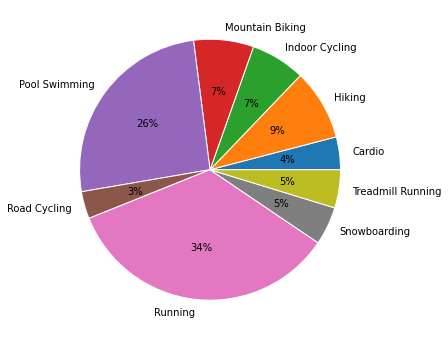

In [37]:
# Frequency table for activities
garmin22_activities = garmin22.groupby('activity').size().to_frame('Count')

# Create pie chart with percentage ratios
fig = plt.subplots(figsize=(6,6))
plt.pie(garmin22_activities['Count'], 
        labels = garmin22_activities.index,
        autopct = '%1.0f%%',
        wedgeprops = {'linewidth': 1.0, 'edgecolor': 'white'})
plt.legend;

**Bar Chart**

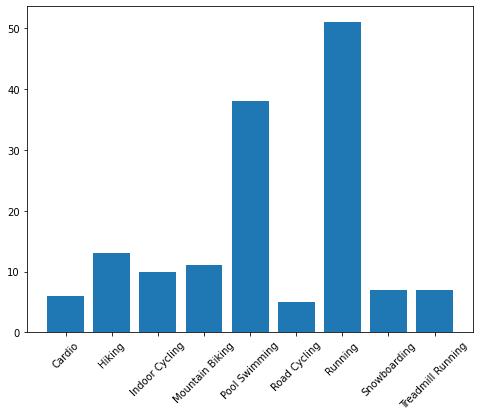

In [38]:
fig_bar = plt.subplots(figsize=(8,6))
plt.bar(garmin22_activities.index, garmin22_activities['Count'])
plt.xticks(rotation=45);

## Totals

### Calories

In [39]:
sum_cols = ['distance', 'calories',
            'total_ascent', 'total_descent']

garmin22[sum_cols].sum()

distance         48584.34
calories         76161.00
total_ascent     13888.00
total_descent    50647.00
dtype: float64